In [56]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [57]:
# Specify paths
parcel_file_csv = "Data/Beaufort_parcels_regression.csv"
parcel_file_shp = "Data/Beaufort_final_8.shp"
results_path = "Results/"  # Change this for different output files

### Buyers, sellers, transactions


In [58]:
df_list = []

i = 0
for file in os.listdir(results_path):
    if file.startswith("model"):
        model_df = pd.read_pickle(results_path + file)
        model_df["Step"] = model_df.index
        model_df["Run"] = int(file.split("]")[0][-1])
        df_list.append(model_df)
        i += 1

model_df = pd.concat(df_list)
model_df["Year"] = 0.5 * model_df["Step"]
model_df

,Households,N_sellers,N_buyers,Sold properties,Successful sellers,Successful buyers,P_ask,P_bid,P_trans,Trans history,Regression coefs,Step,Run,Year
0,3520,0,0,[],[],[],[],[],[],0,"[11.337, 0.108, -0.011, -0.01, 9.4e-05, 0.001,...",0,0,0.0
1,3761,359,241,"[5962.0, 3175.0, 4786.0, 5656.0, 3673.0, 4723....","[19, 49, 58, 62, 92, 193, 346, 365, 384, 483, ...","[3666, 3628, 3862, 3684, 3670, 3744, 3766, 357...","[453200.0, 800700.0, 1062700.0, 226900.0, 9855...","[475000, 836000, 1107000, 237000, 1002000, 930...","[475000, 836000, 1107000, 237000, 1002000, 930...",0,"[11.337, 0.108, -0.011, -0.01, 9.4e-05, 0.001,...",1,0,0.5
2,3896,638,376,"[5810.0, 5813.0, 4419.0, 2436.0, 1909.0, 5186....","[13, 42, 65, 100, 108, 146, 187, 197, 215, 259...","[4102, 3957, 3701, 3647, 3904, 4023, 4085, 377...","[219800.0, 100300.0, 180200.0, 276900.0, 18560...","[224000, 100000, 182000, 287000, 187000, 11300...","[224000, 100000, 182000, 287000, 187000, 11300...",1,"[11.337, 0.108, -0.011, -0.01, 9.4e-05, 0.001,...",2,0,1.0
3,4010,871,490,"[3590.0, 1715.0, 5099.0, 3246.0, 6255.0, 4120....","[12, 38, 56, 67, 116, 119, 129, 138, 140, 257,...","[3602, 4184, 4156, 4070, 3643, 4202, 3940, 397...","[412800.0, 290800.0, 71000.0, 390100.0, 230900...","[431000, 304000, 72000, 397000, 233000, 453000...","[431000, 304000, 72000, 397000, 233000, 453000...",2,"[11.337, 0.108, -0.011, -0.01, 9.4e-05, 0.001,...",3,0,1.5
4,4119,877,599,"[6027.0, 2435.0, 2975.0, 2872.0, 6089.0, 3913....","[26, 36, 50, 96, 99, 102, 113, 151, 158, 177, ...","[3612, 4572, 4232, 4166, 3818, 4276, 4018, 425...","[474900.0, 580400.0, 79000.0, 363700.0, 426600...","[485000, 606000, 78000, 378000, 445000, 483000...","[485000, 606000, 78000, 378000, 445000, 483000...",3,"[11.337, 0.108, -0.011, -0.01, 9.4e-05, 0.001,...",4,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,4186,604,666,"[3586.0, 5795.0, 3957.0, 2173.0, 4986.0, 325.0...","[52, 172, 509, 2105, 2109, 2288, 2502, 3439, 4...","[20059, 20511, 19867, 21001, 20662, 18478, 207...","[236400.0, 267597.0, 417700.0, 1183446.0, 1598...","[239000, 260000, 435000, 1182000, 159000, 2130...","[239000, 260000, 435000, 1183446.0, 159000, 21...",9,"[12.499721474221564, 0.09909378977015659, -0.0...",56,1,28.0
57,4183,615,663,"[6414.0, 5692.0, 2977.0, 2666.0, 3617.0, 6376....","[505, 607, 882, 1447, 1682, 1952, 2212, 2949, ...","[20948, 20900, 20429, 20568, 21156, 20465, 209...","[112959.0, 285417.0, 443200.0, 208989.0, 37460...","[110000, 294000, 454000, 200000, 380000, 90000...","[110000, 294000, 454000, 200000, 380000, 90000...",7,"[12.540794757059448, 0.0993625381237137, -0.00...",57,1,28.5
58,4205,624,685,"[3625.0, 4289.0, 6325.0, 3708.0, 2747.0, 6491....","[87, 139, 248, 442, 1161, 1168, 1224, 1495, 16...","[20765, 21096, 21505, 4049, 21564, 21454, 1912...","[81800.0, 87300.0, 170600.0, 132264.0, 201069....","[85000, 91000, 173000, 136000, 203000, 165000,...","[85000, 91000, 173000, 136000, 203000, 165000,...",11,"[12.584871960193809, 0.09770672174108003, -0.0...",58,1,29.0
59,4199,655,679,"[2738.0, 2939.0, 4028.0, 6327.0, 2749.0, 1369....","[188, 257, 529, 1615, 1723, 2132, 2380, 3239, ...","[21661, 21774, 20828, 20357, 20826, 20999, 212...","[183200.0, 311900.0, 60600.0, 112860.0, 368300...","[184000, 325000, 63000, 114000, 383000, 628000...","[184000, 325000, 63000, 114000, 383000, 628000...",8,"[12.647629674660656, 0.09337696251730698, -0.0...",59,1,29.5


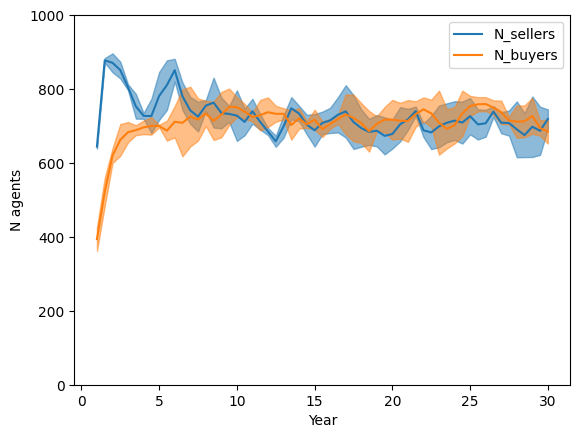

In [59]:
%matplotlib inline
model_df_mean = model_df.groupby(["Year"])[["N_sellers", "N_buyers"]].mean()
model_df_std = model_df.groupby(["Year"])[["N_sellers", "N_buyers"]].std()

model_df_mean = model_df_mean[1:]
model_df_std = model_df_std[1:]

model_df_mean.plot()
for i, group in enumerate(["N_sellers", "N_buyers"]):
    plt.fill_between(model_df_mean.index,
                     (model_df_mean - model_df_std)[group],
                     (model_df_mean + model_df_std)[group],
                     color=plt.legend().legendHandles[i].get_color(),
                     alpha=0.5)

plt.ylabel("N agents")
plt.ylim(0, 1000)
plt.show()

### Prices, incomes, transactions per flood zone

In [60]:
# Read spatial data
spatial_df = gpd.read_file(parcel_file_shp)
spatial_df = spatial_df.rename(columns={"ID1": "Property ID"}).set_index("Property ID")

# Redo original preprocessing for relevant parcel attributes
spatial_df.loc[spatial_df["DFLOOD_A_1"] == 1, "FLOOD_PROB"] = 0.01
spatial_df.loc[spatial_df["DFLOOD_X_1"] == 1, "FLOOD_PROB"] = 0.002
spatial_df["FLOOD_PROB"] = spatial_df["FLOOD_PROB"].drop(columns=["DFLOOD_A_1", "DFLOOD_X_1"])
spatial_df["FLOOD_PROB"] = spatial_df["FLOOD_PROB"].fillna(0)

# Disregard roads for visualization
spatial_df = spatial_df.drop([2, 4, 153, 923, 966, 1042, 1283, 1290, 1492, 1710, 1808, 2241, 2313,
                              2375, 2671, 2902, 3015, 3078, 3107, 3131, 3134, 3709, 3870, 4257, 4281, 5507])
# spatial_df.head()

In [61]:
buyers_df_list = []
owners_df_list = []
i = 0
for file in os.listdir(results_path):
    if file.startswith("agent"):
        agent_df = pd.read_pickle(results_path + file)
        buyers_df = agent_df[(agent_df["Type"] == "Household") & (agent_df['Property ID'].isna())].copy()
        buyers_df["Run"] = int(file.split("]")[0][-1])
        buyers_df_list.append(buyers_df)
        owners_df = agent_df[(agent_df["Type"] == "Household") & (~agent_df['Property ID'].isna())].copy()
        owners_df["Run"] = int(file.split("]")[0][-1])
        owners_df_list.append(owners_df)
        i += 1

owners_df = pd.concat(owners_df_list)
owners_df = owners_df.reset_index().set_index("Property ID")
owners_df["FLOOD_PROB"] = spatial_df["FLOOD_PROB"]
owners_df["Year"] = 0.5 * owners_df["Step"]
owners_df["geometry"] = spatial_df["geometry"]
owners_df = gpd.GeoDataFrame(owners_df)
owners_df = owners_df.reset_index().set_index(["Year", "Run", "FLOOD_PROB"])

buyers_df = pd.concat(buyers_df_list).reset_index()
buyers_df["Year"] = 0.5 * buyers_df["Step"]
buyers_df = buyers_df.set_index(["Year", "Run"])

owners_df

Property ID  Step  AgentID       Type Market status  \
Year Run FLOOD_PROB                                                        
0.0  1   0.000            5703.0     0        1  Household      Inactive   
         0.010            2752.0     0        2  Household      Inactive   
         0.002            5039.0     0        3  Household      Inactive   
         0.010            4009.0     0        4  Household      Inactive   
         0.010            6316.0     0        5  Household      Inactive   
...                          ...   ...      ...        ...           ...   
30.0 0   0.002            5266.0    60    22028  Household      Inactive   
         0.000            4615.0    60    22031  Household      Inactive   
         0.002            3553.0    60    22035  Household      Inactive   
         0.000            2500.0    60    22036  Household      Inactive   
         0.010            1794.0    60    22041  Household      Inactive   

                       Income  Property price  Property N sales  Coastal pref  \
Year Run FLOOD_PROB                                                             
0.0  1   0.000        38740.0        141800.0               0.0      0.434842   
         0.010        41190.0        263000.0               0.0      0.529056   
         0.002         8362.0         50100.0               0.0      0.527336   
         0.010        65300.0         90300.0               0.0      0.501986   
         0.010        15080.0         91500.0               0.0      0.500407   
...                       ...             ...               ...           ...   
30.0 0   0.002        12680.0        106000.0               4.0      0.482332   
         0.000        14570.0        126000.0               9.0      0.514385   
         0.002        16090.0        125000.0               2.0      0.521175   
         0.000        10100.0         88000.0               2.0      0.418913   
         0.010       146630.0       1110000.0               7.0      0.507186   

                     RP bias  \
Year Run FLOOD_PROB            
0.0  1   0.000           0.0   
         0.010           0.0   
         0.002           0.0   
         0.010           0.0   
         0.010           0.0   
...                      ...   
30.0 0   0.002           0.0   
         0.000           0.0   
         0.002           0.0   
         0.000           0.0   
         0.010           0.0   

                                                              geometry  
Year Run FLOOD_PROB                                                     
0.0  1   0.000       POLYGON ((2703819.871 359477.943, 2703799.872 ...  
         0.010       POLYGON ((2713773.691 372073.349, 2713675.190 ...  
         0.002       POLYGON ((2702879.091 360717.071, 2702818.091 ...  
         0.010       POLYGON ((2706734.270 363243.852, 2706554.494 ...  
         0.010       POLYGON ((2714818.098 358314.551, 2714813.346 ...  
...                                                                ...  
30.0 0   0.002       POLYGON ((2702015.580 360197.931, 2701944.272 ...  
         0.000       POLYGON ((2702966.836 361511.362, 2703011.087 ...  
         0.002       POLYGON ((2710715.948 365373.773, 2710609.195 ...  
         0.000       POLYGON ((2705188.013 374216.527, 2705179.512 ...  
         0.010       POLYGON ((2699155.369 379237.448, 2699153.372 ...  

[644160 rows x 11 columns]

#### Household incomes

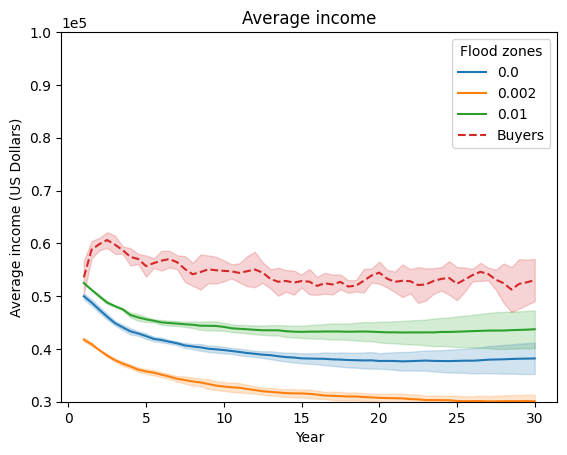

In [62]:
# Buyers income
buyers_mean = buyers_df[["Income"]].groupby(["Year", "Run"]).mean().groupby("Year").mean()
buyers_std = buyers_df[["Income"]].groupby(["Year", "Run"]).mean().groupby("Year").std()

# Owners income per flood zone
owners_mean = owners_df[["Income"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Income"].groupby(["Year", "FLOOD_PROB"]).mean().unstack()
owners_std = owners_df[["Income"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Income"].groupby(["Year", "FLOOD_PROB"]).std().unstack()

# Do not plot first timestep
owners_mean = owners_mean.loc[1:]
owners_std = owners_std.loc[1:]
buyers_mean = buyers_mean[1:]
buyers_std = buyers_std[1:]

# Plot average incomes + std
fig, ax = plt.subplots()
owners_mean.plot(ax=ax)
for i, prob in enumerate([0, 0.002, 0.01]):
    ax.fill_between(owners_mean.index,
                    owners_mean[prob] - owners_std[prob],
                    owners_mean[prob] + owners_std[prob],
                    alpha=0.2, color=plt.legend().legendHandles[i].get_color())

ax.plot(buyers_mean, label="Buyers", color="tab:red", ls="--")
ax.fill_between(buyers_mean.index,
                (buyers_mean - buyers_std).values.flatten(),
                (buyers_mean + buyers_std).values.flatten(),
                alpha=0.2, color="tab:red")

plt.ticklabel_format(axis='y', scilimits=(0, 0))
plt.ylim(3e4, 1e5)
plt.ylabel("Average income (US Dollars)")
plt.title("Average income")
plt.legend(title="Flood zones")
plt.show()

#### Property prices

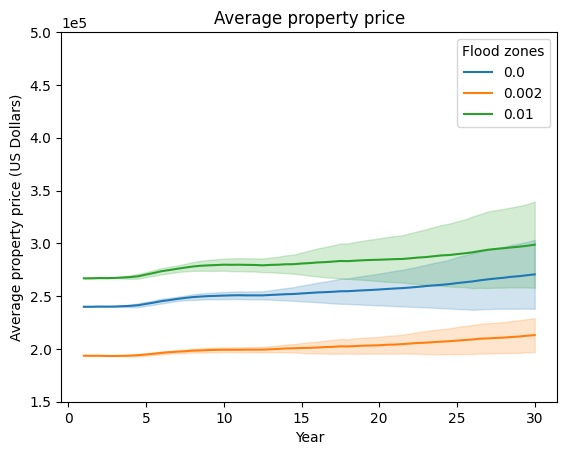

In [63]:
%matplotlib inline
# Average property prices
owners_mean = owners_df[["Property price"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Property price"].groupby(["Year", "FLOOD_PROB"]).mean().unstack()
owners_std = owners_df[["Property price"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Property price"].groupby(["Year", "FLOOD_PROB"]).std().unstack()

owners_mean = owners_mean[1:]
owners_std = owners_std[1:]

fig, ax = plt.subplots()
owners_mean.plot(ax=ax)
for i, prob in enumerate([0, 0.002, 0.01]):
    ax.fill_between(owners_mean.index,
                    owners_mean[prob] - owners_std[prob],
                    owners_mean[prob] + owners_std[prob],
                    alpha=0.2, color=plt.legend().legendHandles[i].get_color())

plt.ticklabel_format(axis='y', scilimits=(0, 0))
plt.ylim(1.5e5, 5e5)
plt.ylabel("Average property price (US Dollars)")
plt.title("Average property price")
plt.legend(title="Flood zones")
plt.show()

#### Income/price ratio (compare runs)

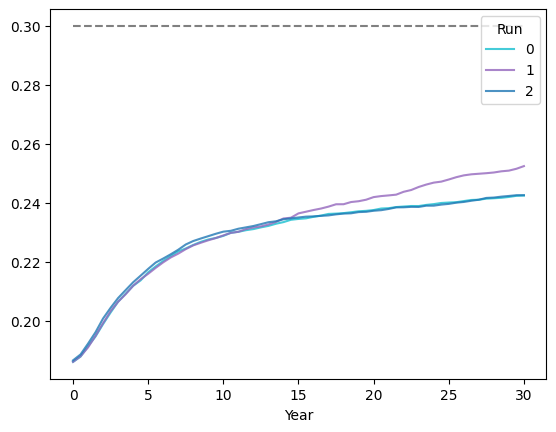

In [64]:
# Get ratio of property price / income / 30 (years mortgage).
# The resulting number is related to the maximum 30% of income spent on housing
# rule as described in Filatova (2015). The grey line indicated this maximum value.
ratio_df = owners_df[["Income", "Property price"]].copy()
ratio_df["Income price ratio"] = ratio_df["Property price"]/ratio_df["Income"]/30
ratio_df = ratio_df.groupby(["Year", "Run"]).mean()["Income price ratio"].unstack()
ratio_df.plot(cmap="tab10_r", alpha=0.8)
plt.hlines(0.3, min(ratio_df.index), max(ratio_df.index),
           color="grey", linestyle="--")
plt.show()

#### Income/price ratio (average over runs, per flood zone)

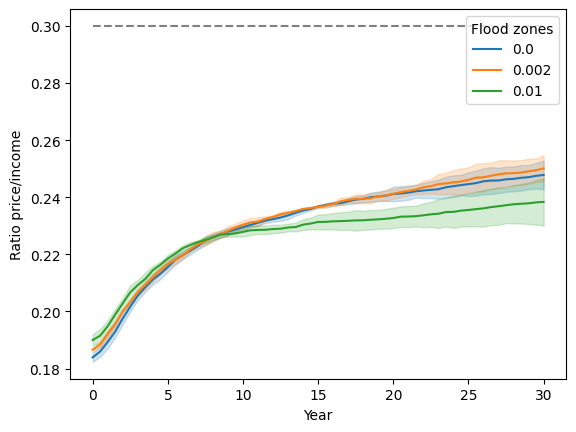

In [65]:
# Owners income per flood zone
owners_df["Income price ratio"] = owners_df["Property price"]/owners_df["Income"]/30
owners_mean = owners_df[["Income price ratio"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Income price ratio"].groupby(["Year", "FLOOD_PROB"]).mean().unstack()
owners_std = owners_df[["Income price ratio"]].groupby(["Year", "Run", "FLOOD_PROB"]).mean()["Income price ratio"].groupby(["Year", "FLOOD_PROB"]).std().unstack()

# Plot average incomes + std
fig, ax = plt.subplots()
owners_mean.plot(ax=ax)
for i, prob in enumerate([0, 0.002, 0.01]):
    ax.fill_between(owners_mean.index,
                    owners_mean[prob] - owners_std[prob],
                    owners_mean[prob] + owners_std[prob],
                    alpha=0.2, color=plt.legend().legendHandles[i].get_color())

plt.hlines(0.3, min(ratio_df.index), max(ratio_df.index),
           color="grey", linestyle="--")
plt.ylabel("Ratio price/income")
plt.legend(title="Flood zones")
plt.show()

#### Transactions per flood zone

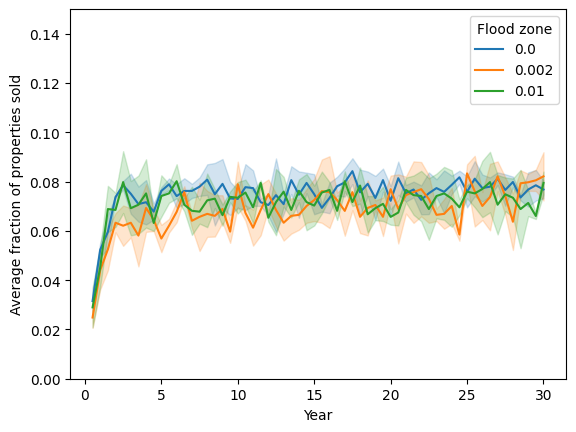

In [66]:
# Load transactions and order per run per property
trans_per_flood_df = model_df[["Sold properties", "P_ask", "P_bid", "P_trans", "Run"]].copy()
trans_per_flood_df = trans_per_flood_df.drop(0)
trans_per_flood_df.index.rename("Year", inplace=True)
trans_per_flood_df.index = trans_per_flood_df.index * 0.5
trans_per_flood_df = trans_per_flood_df.set_index("Run", append=True)
trans_per_flood_df = trans_per_flood_df.explode(["Sold properties", "P_ask", "P_bid", "P_trans"])
trans_per_flood_df = trans_per_flood_df.reset_index().set_index(["Run", "Sold properties"])

trans_per_flood_df = pd.get_dummies(trans_per_flood_df["Year"])
trans_per_flood_df = trans_per_flood_df.groupby(["Run", "Sold properties"]).sum()
trans_per_flood_df = trans_per_flood_df.reset_index().set_index(["Sold properties"])
trans_per_flood_df = trans_per_flood_df.merge(spatial_df[["FLOOD_PROB"]], left_index=True, right_index=True)
trans_per_flood_df = trans_per_flood_df.groupby(["FLOOD_PROB", "Run"]).sum()
trans_per_flood_df = trans_per_flood_df.transpose()
trans_per_flood_df[0.01] = trans_per_flood_df[0.01]/944
trans_per_flood_df[0.002] = trans_per_flood_df[0.002]/832
trans_per_flood_df[0] = trans_per_flood_df[0]/1745

# Get mean and std over runs
trans_per_flood_df_mean = trans_per_flood_df.transpose().groupby("FLOOD_PROB").mean()
trans_per_flood_df_std = trans_per_flood_df.transpose().groupby("FLOOD_PROB").std()
trans_per_flood_df_std

trans_per_flood_df_mean.transpose().plot()
for i, prob in enumerate([0,  0.002, 0.01]):
    plt.fill_between(list(trans_per_flood_df_mean.columns.values),
                     trans_per_flood_df_mean.loc[prob] - trans_per_flood_df_std.loc[prob],
                     trans_per_flood_df_mean.loc[prob] + trans_per_flood_df_std.loc[prob],
                     alpha=0.2, color=plt.legend().legendHandles[i].get_color())

plt.ylim(0, 0.15)
plt.xlabel("Year")
plt.ylabel("Average fraction of properties sold")
plt.legend(title="Flood zone")
plt.show()

## Price estimation: fitting regression or kriging model

#### Regression coefficients

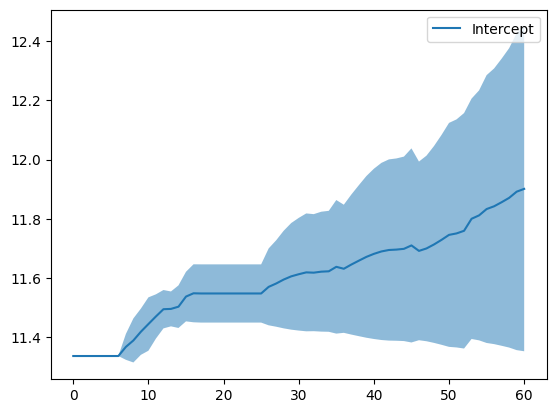

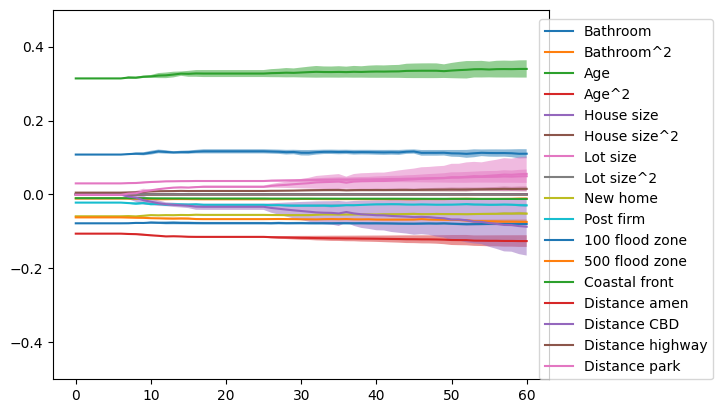

In [67]:
%matplotlib inline
coefs_avg = model_df["Regression coefs"].groupby(model_df["Step"]).mean()
coefs_std = model_df[["Regression coefs"]].stack().groupby(level=0).apply(lambda x:
                                                                          np.round(np.array(x).std(), 4))

coefs_avg = pd.DataFrame(coefs_avg.values.tolist())
coefs_std = pd.DataFrame(coefs_std.values.tolist())

coefs_avg[0].plot(label="Intercept")
plt.fill_between(coefs_avg.index,
                 coefs_avg[0] - coefs_std[0],
                 coefs_avg[0] + coefs_std[0],
                 alpha=0.5)
# plt.ylim(10, 14)
plt.legend()
plt.show()

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
if "Results/Kriging" in results_path:
    labels = ["Age", "House size", "Lot size", "N bedrooms", "Flood zone"]
else:
    labels = ["Bathroom", "Bathroom^2",
              "Age", "Age^2",
              "House size", "House size^2",
              "Lot size", "Lot size^2",
              "New home", "Post firm", "100 flood zone", "500 flood zone", "Coastal front",
              "Distance amen", "Distance CBD", "Distance highway", "Distance park"
             ]
coefs_avg = coefs_avg.drop(columns=0)
coefs_std = coefs_std.drop(columns=0)
for coef in coefs_avg.columns:
    plt.plot(coefs_avg[coef], label=labels[coef-1])
for coef in coefs_avg.columns:
    plt.fill_between(coefs_avg.index,
                     coefs_avg[coef] - coefs_std[coef],
                     coefs_avg[coef] + coefs_std[coef],
                     alpha=0.5)
plt.ylim(-0.5, 0.5)
plt.legend(loc=(0.98, 0))
plt.show()

#### Number of historical transactions needed to fit model


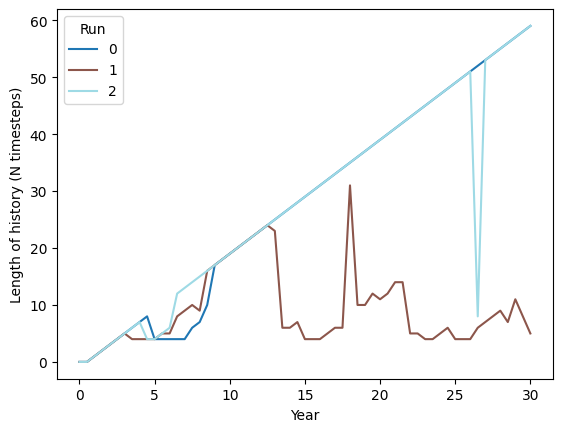

In [68]:
%matplotlib inline

trans_history = model_df.groupby(["Year", "Run"])["Trans history"].mean().unstack()
trans_history.plot(cmap="tab20")
plt.ylabel("Length of history (N timesteps)")
plt.show()

## Spatial plots


#### Variables per agent/property

In [73]:
property_df_list = []
i = 0
for file in os.listdir(results_path):
    if file.startswith("agent"):
        agent_df = pd.read_pickle(results_path + file)
        property_df = agent_df[(agent_df["Type"] == "Household") & (~agent_df['Property ID'].isna())].copy()
        property_df["Run"] = int(file.split("]")[0][-1])
        property_df_list.append(property_df)
        i += 1

# Add flood zones
property_df = pd.concat(property_df_list)
property_df = property_df.reset_index().set_index("Property ID")
property_df["FLOOD_PROB"] = spatial_df["FLOOD_PROB"]
property_df["Year"] = 0.5 * property_df["Step"]
property_df["geometry"] = spatial_df["geometry"]
property_df = gpd.GeoDataFrame(property_df)
property_df = property_df.reset_index().set_index(["Run", "Step", "Property ID"])
# property_df

In [74]:
# Add price changes per property
price_gradients = property_df.sort_values(["Run", "Property ID"])["Property price"].diff()
property_df["Price change"] = price_gradients
property_df = property_df.reset_index().set_index("Property ID")
property_df.loc[property_df["Step"] == 0, ["Price change"]] = 0
# property_df

In [75]:
# Add cumulative price changes
property_df = property_df.sort_values(["Run", "Property ID"])
prices = property_df.groupby(["Run", "Property ID"])["Price change"]
property_df["Cumulative price change"] = prices.cumsum()
property_df = property_df.reset_index().set_index("Property ID")
property_df

,Run,Step,AgentID,Type,Market status,Income,Property price,Property N sales,Coastal pref,RP bias,FLOOD_PROB,Year,geometry,Price change,Cumulative price change
Property ID,,,,,,,,,,,,,,,
103.0,0,0,763,Household,Inactive,21980.0,127700.0,0.0,0.522350,0.0,0.01,0.0,"POLYGON ((2709369.134 401503.229, 2709325.885 ...",0.0,0.0
103.0,0,1,763,Household,Inactive,21980.0,127700.0,0.0,0.522350,0.0,0.01,0.5,"POLYGON ((2709369.134 401503.229, 2709325.885 ...",0.0,0.0
103.0,0,2,763,Household,Seller,21980.0,127700.0,0.0,0.522350,0.0,0.01,1.0,"POLYGON ((2709369.134 401503.229, 2709325.885 ...",0.0,0.0
103.0,0,3,763,Household,Seller,21980.0,126500.0,0.0,0.522350,0.0,0.01,1.5,"POLYGON ((2709369.134 401503.229, 2709325.885 ...",-1200.0,-1200.0
103.0,0,4,763,Household,Seller,21980.0,125235.0,0.0,0.522350,0.0,0.01,2.0,"POLYGON ((2709369.134 401503.229, 2709325.885 ...",-1265.0,-2465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538.0,2,56,15841,Household,Inactive,97460.0,738000.0,1.0,0.488384,0.0,0.01,28.0,"POLYGON ((2715113.905 357233.450, 2715111.308 ...",0.0,-69600.0
6538.0,2,57,15841,Household,Inactive,97460.0,738000.0,1.0,0.488384,0.0,0.01,28.5,"POLYGON ((2715113.905 357233.450, 2715111.308 ...",0.0,-69600.0
6538.0,2,58,15841,Household,Inactive,97460.0,738000.0,1.0,0.488384,0.0,0.01,29.0,"POLYGON ((2715113.905 357233.450, 2715111.308 ...",0.0,-69600.0


In [76]:
def plot_beaufort(variable, year, logscale=False, divergent=False, save=False):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.axis("off")

    # Plot parcels
    spatial_df[spatial_df["CITY"] != "Water"].plot(ax=ax,
                                                   color="sandybrown", alpha=0.4)
    spatial_df[spatial_df["CITY"] == "Water"].plot(ax=ax,
                                                   color="lightblue", alpha=0.7)

    # Plot variable of interest (averaged over runs)
    df = gpd.GeoDataFrame(property_df[property_df["Year"] == year].groupby(["Property ID"])[[variable]].mean())
    df["geometry"] = property_df[(property_df["Run"] == 0) & (property_df["Year"] == year)]["geometry"]
    if logscale:
        df.plot(variable, ax=ax,
                cmap="YlGn",
                legend=True, legend_kwds={"shrink": 0.3, "label": variable},
                norm=colors.LogNorm(vmin=1e5, vmax=1e7)
                )
    elif divergent:
        df.plot(variable, ax=ax,
                cmap="RdYlGn",
                legend=True, legend_kwds={"shrink": 0.3, "label": variable},
#                 norm=colors.TwoSlopeNorm(vmin=df[variable].min(), vcenter=0, vmax=df[variable].max()),
                vmin=-1e6,
                vmax=1e6
               )
    else:
        df.plot(variable, ax=ax,
                cmap="YlGn",
                legend=True, legend_kwds={"shrink": 0.3, "label": variable},
                vmin=1e2,
                vmax=1e5
               )

    # Plot flood zones
    flood_df = spatial_df.copy()
    flood_df["FLOOD_PROB"] = flood_df["FLOOD_PROB"].replace({0: np.nan})
    flood_df.plot("FLOOD_PROB", ax=ax,
                   categorical=True,
                   legend=True, legend_kwds={"title": "Flood probability"},
                   cmap="Blues",
                   norm=colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1.5),
                   alpha=0.5,
                   hatch=r"\\", edgecolor="tab:blue",
                   linewidth=0
                  )
    
    # Plot settings
    for ax in fig.axes:
        ax.tick_params(labelsize=8)
    plt.tight_layout()
    if save:
        plt.savefig("Figures/temp/Beaufort_" + variable + "_T" + str(year) + ".png",
                    dpi=300)
        plt.close()
    else:
        plt.show()

### Cumulative price changes

<IPython.core.display.Javascript object>


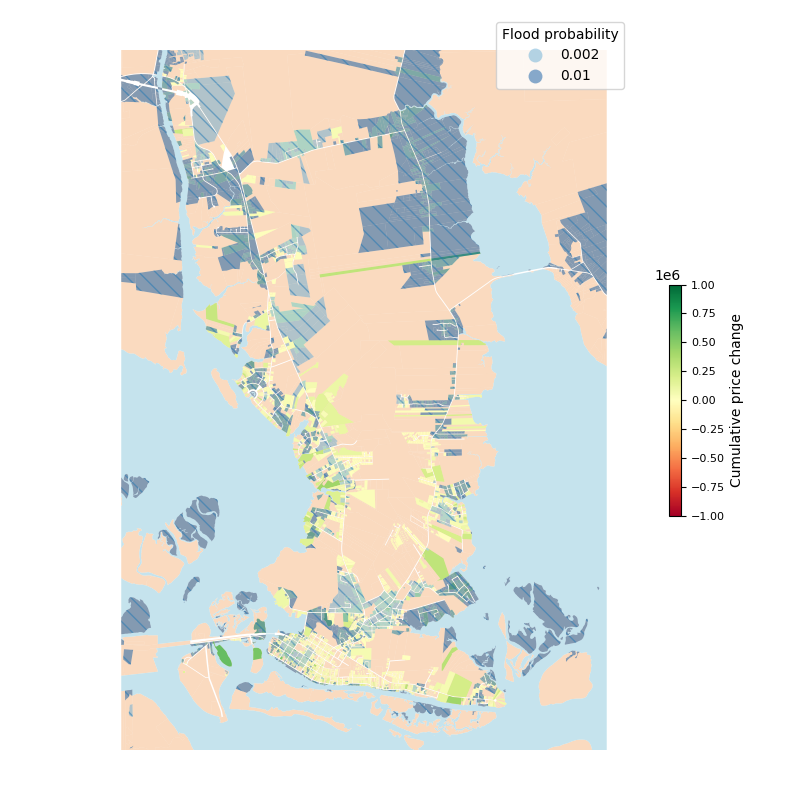

In [77]:
%matplotlib notebook
plot_beaufort(variable="Cumulative price change", year=30, divergent=True)

In [19]:
# %matplotlib inline
# for year in np.arange(0.5, 30, 1):
#     # NOTE: 30 years too long for plotting every year, but once in two years gives very sudden jumps.
#     plot_beaufort(variable="Cumulative price change", year=year, divergent=True, save=True)

### Household income

<IPython.core.display.Javascript object>


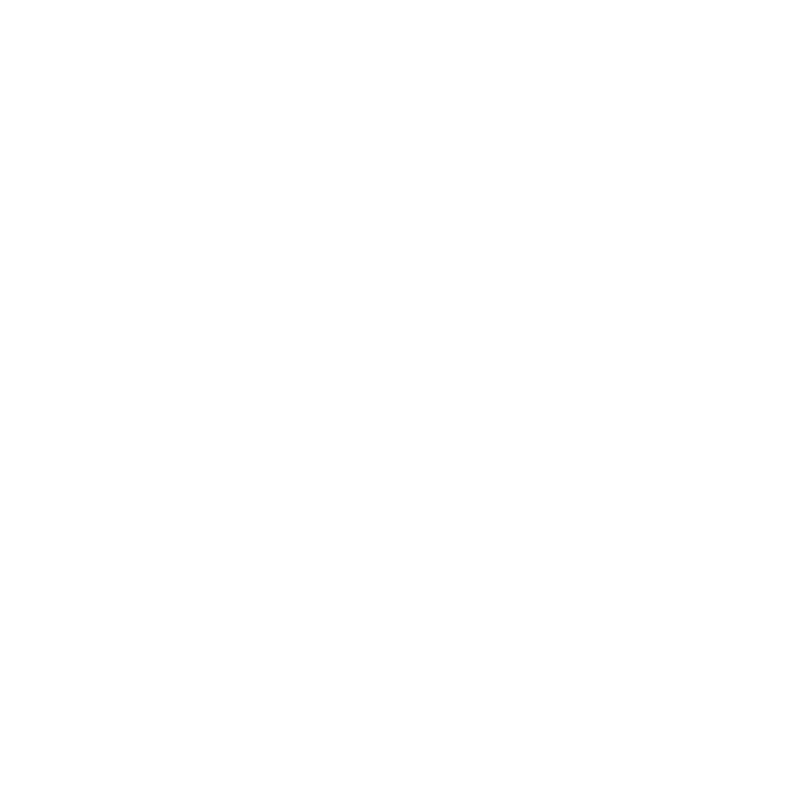

<IPython.core.display.Javascript object>


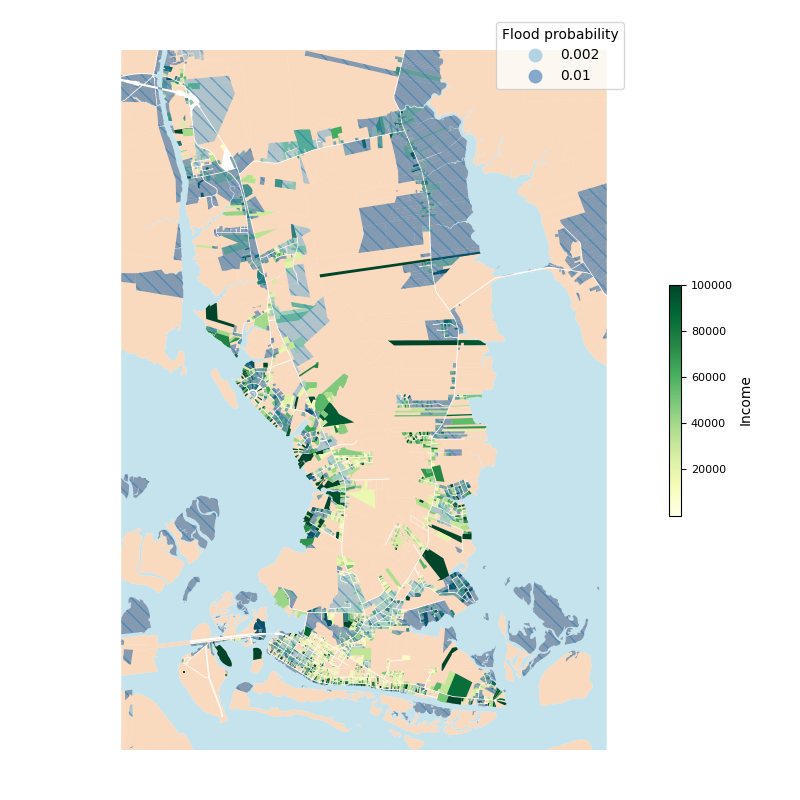

In [78]:
%matplotlib notebook
plot_beaufort(variable="Income", year=1, save=True)
plot_beaufort(variable="Income", year=30)

In [ ]:
%matplotlib inline
for year in np.arange(0.5, 10, 1):
    plot_beaufort(variable="Income", year=year, logscale=False, save=True)

### Spatial distributions

#### Amenities

In [47]:
parcel_df = pd.read_csv(parcel_file_csv)
parcel_df = parcel_df.rename(columns={"ID1": "Property ID"}).set_index("Property ID")

In [48]:
temp = spatial_df[spatial_df.index.isin(property_df.index)].copy()
temp["PROXAMEN_1"] = parcel_df["PROXAMEN_1"]
print("Proximity coastal amenities not in flood zone:", temp[(temp["DFLOOD_X_1"] == 0) &
                                                             (temp["DFLOOD_A_1"] == 0)]["PROXAMEN_1"].mean())
print("Proximity coastal amenities for 500 flood zone:", temp[temp["DFLOOD_X_1"] == 1]["PROXAMEN_1"].mean())
print("Proximity coastal amenities for 100 flood zone:", temp[temp["DFLOOD_A_1"] == 1]["PROXAMEN_1"].mean())

Proximity coastal amenities not in flood zone: 7003.512853784403
Proximity coastal amenities for 500 flood zone: 6381.742877403845
Proximity coastal amenities for 100 flood zone: 6943.780887711864


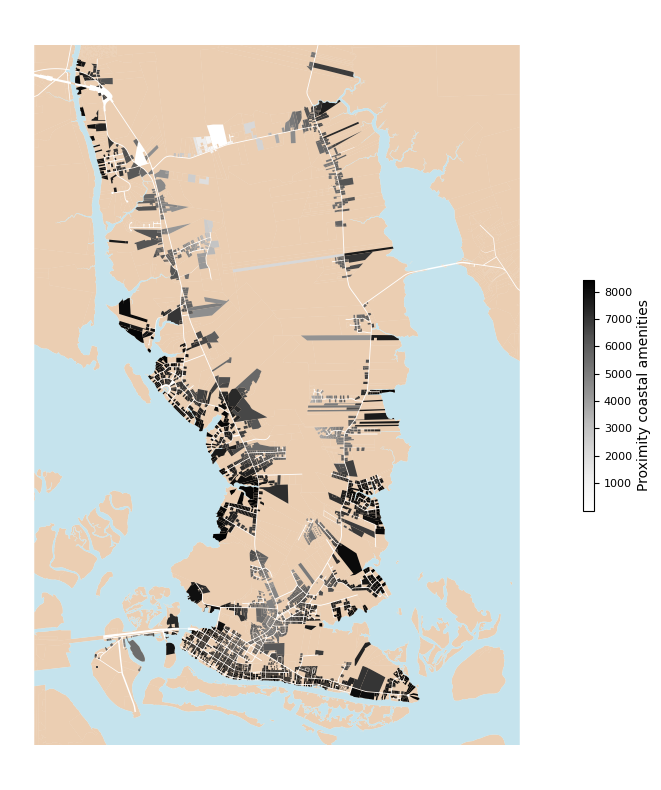

In [49]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,8))
ax.axis("off")

# Plot parcels
spatial_df[spatial_df["CITY"] != "Water"].plot(ax=ax,
                                               color="peru", alpha=0.4)
spatial_df[spatial_df["CITY"] == "Water"].plot(ax=ax,
                                               color="lightblue", alpha=0.7)

# Plot distance to coastal amenities
temp = spatial_df[spatial_df.index.isin(property_df.index)].copy()
temp["PROXAMEN_1"] = parcel_df["PROXAMEN_1"]
temp.plot("PROXAMEN_1", ax=ax, cmap="Greys",
          legend=True, legend_kwds={"shrink": 0.3, "label": "Proximity coastal amenities"})

# Plot settings
for ax in fig.axes:
    ax.tick_params(labelsize=8)
plt.tight_layout()
plt.show()

#### Tax values

In [50]:
print("Tax value not in flood zone:", spatial_df[(spatial_df["DFLOOD_X_1"] == 0) & (spatial_df["DFLOOD_A_1"] == 0)]["TAX_VALUE"].mean())
print("Tax value for 500 flood zone:", spatial_df[spatial_df["DFLOOD_X_1"] == 1]["TAX_VALUE"].mean())
print("Tax value for 100 flood zone:", spatial_df[spatial_df["DFLOOD_A_1"] == 1]["TAX_VALUE"].mean())

Tax value not in flood zone: 225440.62231759657
Tax value for 500 flood zone: 113471.03322784811
Tax value for 100 flood zone: 113575.3160460993


<IPython.core.display.Javascript object>


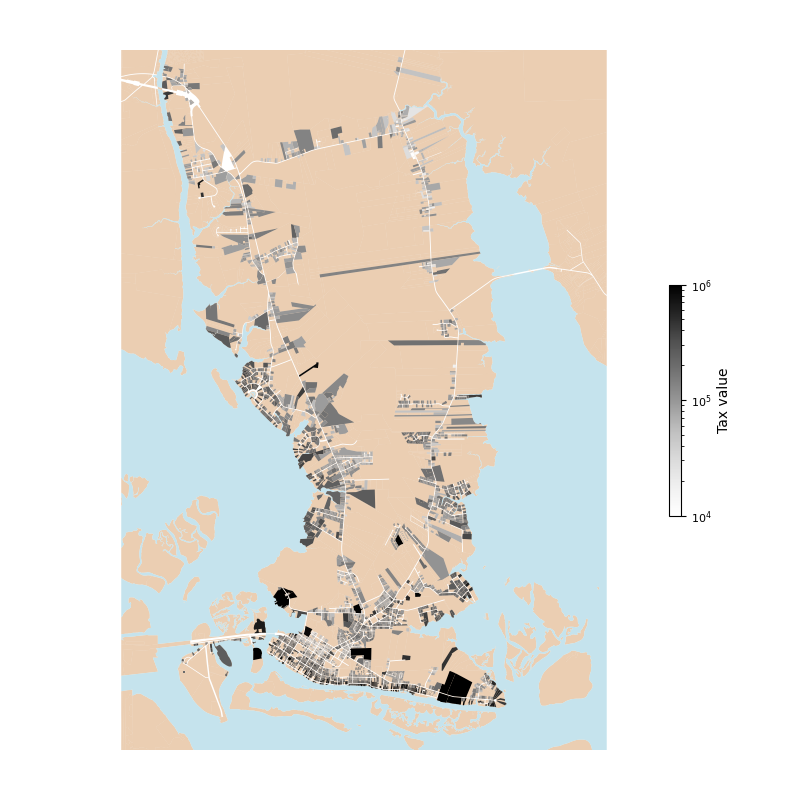

In [51]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(8,8))
ax.axis("off")

# Plot parcels
spatial_df[spatial_df["CITY"] != "Water"].plot(ax=ax,
                                               color="peru", alpha=0.4)
spatial_df[spatial_df["CITY"] == "Water"].plot(ax=ax,
                                               color="lightblue", alpha=0.7)

# Plot distance to coastal amenities
temp = spatial_df[spatial_df.index.isin(property_df.index)].copy()
temp.plot("TAX_VALUE", ax=ax, cmap="Greys",
          norm=colors.LogNorm(vmin=1e4, vmax=1e6),
          legend=True, legend_kwds={"shrink": 0.3, "label": "Tax value"})

# Plot settings
for ax in fig.axes:
    ax.tick_params(labelsize=8)
plt.tight_layout()
plt.show()